In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm

# Optional: if running in an environment that doesn't support inline, use Agg for non-interactive rendering
# import matplotlib
# matplotlib.use('Agg')

print('Matplotlib backend:', plt.get_backend())

Matplotlib backend: inline


Hénon model: 
\begin{align}
    x_{n+1} &= y_n + 1 - ax_n^2\\
    y_{n+1} &= bx_n
\end{align}


In [8]:
def henon_map(a, b, x0, y0, n):
    """
    Generate points of the Henon map
    """
    x, y = x0, y0
    points = np.zeros((n, 2))
    for i in range(n):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        points[i, :] = [x_new, y_new]
        x, y = x_new, y_new
    return points


def plot_henon_map(a, b, x0, y0, n, transitoire):
    """
    Plot the Henon map
    """
    points = henon_map(a, b, x0, y0, n)
    fig, ax = plt.subplots()
    ax.scatter(points[transitoire:, 0], points[transitoire:, 1])
    ax.set_title(f"Henon Map (a={a}, b={b})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis("equal")
    ax.grid(True)
    plt.show()


def plot_bifurcation_diagram(a_values, b, x0, y0, n, last, axis):
    """
    Plot the bifurcation diagram of the Henon map
    """
    fig, ax = plt.subplots()
    if axis == "x":
        for a in a_values:
            points = henon_map(a, b, x0, y0, n)
            ax.scatter([a] * last, points[-last:, 0], s=0.5, c="blue")
    else:
        for a in a_values:
            points = henon_map(a, b, x0, y0, n)
            ax.scatter([a] * last, points[-last:, 1], s=0.5, c="blue")
    ax.set_title(f"Bifurcation Diagram (b={b})")
    ax.set_xlabel("a")
    ax.set_ylabel("x")
    ax.grid(True)
    plt.show()

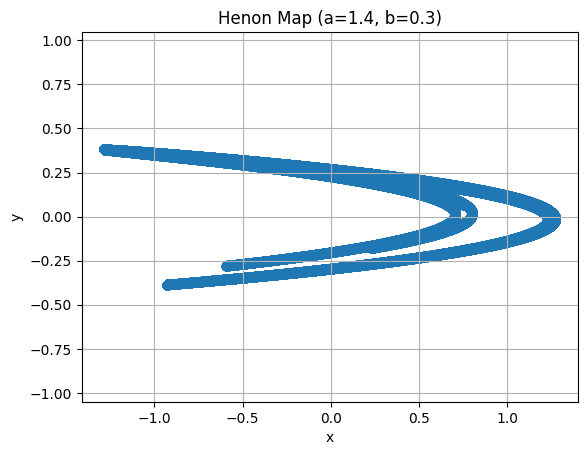

In [9]:
plot_henon_map(a=1.4, b=0.3, x0=0.1, y0=0.1, n=100000, transitoire=100)

/var/folders/g9/2s_b0h716cdgj18bgy7tjlww0000gn/T/ipykernel_7013/3436512866.py:8: RuntimeWarning: overflow encountered in scalar power
  x_new = 1 - a * x**2 + y


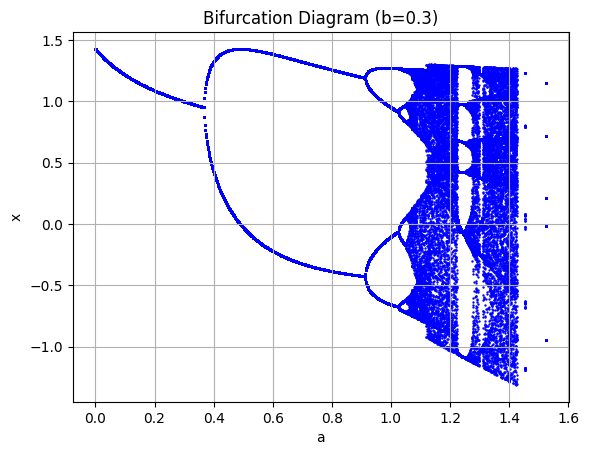

In [10]:
plot_bifurcation_diagram(a_values=np.linspace(0, 1.6, 1000), b=0.3, x0=0.1, y0=0.1, n=10000, last=100, axis="x")

In [11]:
def coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps):
    """Generate points of the coupled Henon map."""
    x, y = x0, y0
    u, v = u0, v0
    points = np.zeros((n, 2, 2))  # [(x, y, u, v)]
    for i in range(n):
        x_new = 1 - a * ((1 - Eps) * x + Eps * u) ** 2 + ((1 - Eps) * y + Eps * v)
        y_new = b * ((1 - Eps) * x + Eps * u)
        u_new = 1 - c * ((1 - Eps) * u + Eps * x) ** 2 + ((1 - Eps) * v + Eps * y)
        v_new = d * ((1 - Eps) * u + Eps * x)

        points[i, :, :] = [
            [x_new, y_new],
            [u_new, v_new],
        ]  # append((x_new, y_new, u_new, v_new))
        x, y = x_new, y_new
        u, v = u_new, v_new

    return points


def plot_coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps, transitoire):
    """Plot the coupled Henon map."""
    points = coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps)
    plt.plot(
        points[transitoire:, 0, 0],
        points[transitoire:, 0, 1],
        "b.",
        markersize=5,
        label="Map 1",
    )
    plt.plot(
        points[transitoire:, 1, 0],
        points[transitoire:, 1, 1],
        "r.",
        markersize=5,
        label="Map 2",
    )
    plt.title(f"Coupled Henon Map (a={a}, b={b}, c={c}, d={d}, Eps={Eps})")
    plt.xlabel("x / u")
    plt.ylabel("y / v")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()

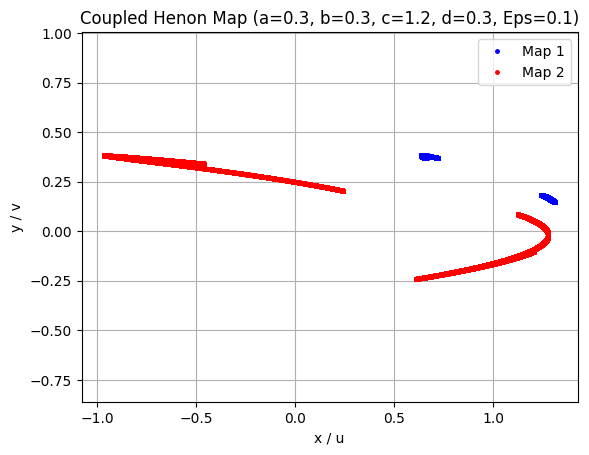

In [12]:
plot_coupled_henon_map(a=0.3, b=0.3,c = 1.2, d = 0.3, x0=0.1, y0=0.1, u0=0.1, v0=0.1, n=100000, Eps=0.1, transitoire=100) 

In [ ]:
# Précalcul de toutes les frames
print("Précalcul des frames...")
c_values = np.linspace(0, 1.4, num=100)  # 100 valeurs de c entre 0 et 1.4
frames_data = []

for c in tqdm(c_values, desc="Calcul en cours"):
    points = coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps)
    # On garde les 1000 derniers points pour éviter la surcharge visuelle
    x, y = points[-points_gardes:, 0, 0], points[-points_gardes:, 0, 1]
    u, v = points[-points_gardes:, 1, 0], points[-points_gardes:, 1, 1]
    frames_data.append(((x, y), (u, v), c))

print("Précalcul terminé!")

# Initialisation de la figure
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(-2, 2)  # Limites fixes pour une meilleure visualisation
ax.set_ylim(-2, 2)
ax.set_xlabel('x / u')
ax.set_ylabel('y / v')
ax.set_title(f'Coupled Henon Map (a={a}, b={b}, Eps={Eps})')
ax.grid(True)

# Initialisation des scatter plots
sc_map1 = ax.scatter([], [], s=5, color='blue', label=f'Map 1 (a={a})')
sc_map2 = ax.scatter([], [], s=5, color='red', label='Map 2 (c variable)')
ax.legend()

# Texte pour afficher la valeur actuelle de c
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    """Initialisation de l'animation"""
    sc_map1.set_offsets(np.empty((0, 2)))
    sc_map2.set_offsets(np.empty((0, 2)))
    time_text.set_text('')
    return sc_map1, sc_map2, time_text

def update(frame):
    """Mise à jour de chaque frame"""
    (x, y), (u, v), c = frames_data[frame]

    # Préparation des données pour le scatter plot
    xy_map1 = np.column_stack((x, y))
    xy_map2 = np.column_stack((u, v))

    sc_map1.set_offsets(xy_map1)
    sc_map2.set_offsets(xy_map2)
    time_text.set_text(f'c = {c:.3f}')

    ax.set_title(f'Coupled Henon Map (a={a}, b={b}, c={c:.2f}, Eps={Eps})')
    return sc_map1, sc_map2, time_text

# Création de l'animation
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(frames_data),
    init_func=init,
    interval=1000,  # Délai entre les frames en ms
    blit=True,
    repeat=True
)

plt.tight_layout()
plt.show()

Précalcul des frames...


Calcul en cours: 100%|██████████| 100/100 [00:01<00:00, 83.70it/s]

Précalcul terminé!


In [20]:
a = 1.2
b = 0.2
c = 0.3
d = 0.2
x0 = 0.0
y0 = 0.0
u0 = 0.0
v0 = 0.0
n = int(1e5)
points_gardes = 1000
transitoire = 100
Eps = [0.1, 0.2, 0.3, 0.4, 0.5]

In [24]:
def coupling_sum(x, y, delta):
    """Return the average sum wrt a certain coupling value"""
    assert 0 < delta < 1, "wrong coupling"
    return (1 - delta) * x + delta * y


def coupled_henon_wrt_coupling(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes):
    """Compute the coupled Henon maps for several coupling strengths Eps.
    Returns an array of shape (points_gardes, 2, num_couplings) where axis 0=time, axis1=(x,y), axis2=coupling index.
    """
    p = len(Eps)
    points = np.zeros((points_gardes, 2, p))
    all_points = np.zeros((points_gardes, 2, 2, p))
    for i in range(p):
        all_points[:, :, :, i] = coupled_henon_map(
            a, b, c, d, x0, y0, u0, v0, n, Eps[i]
        )[-points_gardes:, :, :]
        points = coupling_sum(all_points[:, 0, :, :], all_points[:, 1, :, :], Eps[i])
    return points

In [25]:
simu = coupled_henon_wrt_coupling(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes)
print('simu shape:', np.shape(simu))

simu shape: (1000, 2, 5)


In [27]:
print(np.shape(list(simu[:,0,i])))

(1000,)


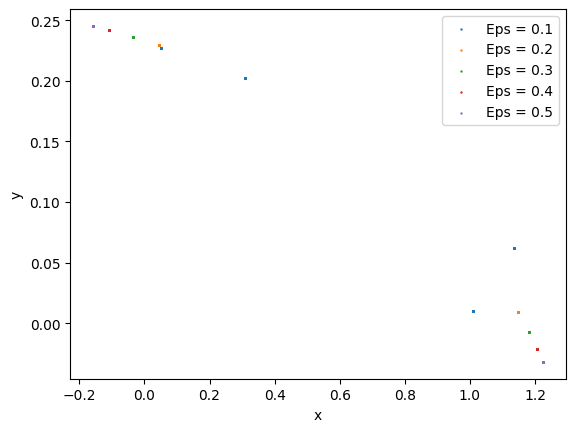

In [29]:
fig, ax = plt.subplots()
for i in range(len(Eps)):
    ax.scatter(simu[:,0,i], simu[:,1,i], s=0.5, label=f"Eps = {Eps[i]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()
plt.show()